In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
pd.options.display.max_columns = 100

In [2]:
train_dat = pd.read_csv('train.csv')

In [28]:
train_dat.shape

(40000, 211)

In [47]:
train_dat.loc[:, 'Ret_63':'Ret_94'].isnull().any()

Ret_63    True
Ret_64    True
Ret_65    True
Ret_66    True
Ret_67    True
Ret_68    True
Ret_69    True
Ret_70    True
Ret_71    True
Ret_72    True
Ret_73    True
Ret_74    True
Ret_75    True
Ret_76    True
Ret_77    True
Ret_78    True
Ret_79    True
Ret_80    True
Ret_81    True
Ret_82    True
Ret_83    True
Ret_84    True
Ret_85    True
Ret_86    True
Ret_87    True
Ret_88    True
Ret_89    True
Ret_90    True
Ret_91    True
Ret_92    True
Ret_93    True
Ret_94    True
dtype: bool

In [52]:
train_dat.loc[:, 'Ret_2':'Ret_180'].describe().loc['min', :].describe()

count    179.000000
mean      -0.036473
std        0.024329
min       -0.184209
25%       -0.043329
50%       -0.029139
75%       -0.020587
max       -0.013109
Name: min, dtype: float64

In [13]:
for col in train_dat.columns:
    print(col + '\n')

Id

Feature_1

Feature_2

Feature_3

Feature_4

Feature_5

Feature_6

Feature_7

Feature_8

Feature_9

Feature_10

Feature_11

Feature_12

Feature_13

Feature_14

Feature_15

Feature_16

Feature_17

Feature_18

Feature_19

Feature_20

Feature_21

Feature_22

Feature_23

Feature_24

Feature_25

Ret_MinusTwo

Ret_MinusOne

Ret_2

Ret_3

Ret_4

Ret_5

Ret_6

Ret_7

Ret_8

Ret_9

Ret_10

Ret_11

Ret_12

Ret_13

Ret_14

Ret_15

Ret_16

Ret_17

Ret_18

Ret_19

Ret_20

Ret_21

Ret_22

Ret_23

Ret_24

Ret_25

Ret_26

Ret_27

Ret_28

Ret_29

Ret_30

Ret_31

Ret_32

Ret_33

Ret_34

Ret_35

Ret_36

Ret_37

Ret_38

Ret_39

Ret_40

Ret_41

Ret_42

Ret_43

Ret_44

Ret_45

Ret_46

Ret_47

Ret_48

Ret_49

Ret_50

Ret_51

Ret_52

Ret_53

Ret_54

Ret_55

Ret_56

Ret_57

Ret_58

Ret_59

Ret_60

Ret_61

Ret_62

Ret_63

Ret_64

Ret_65

Ret_66

Ret_67

Ret_68

Ret_69

Ret_70

Ret_71

Ret_72

Ret_73

Ret_74

Ret_75

Ret_76

Ret_77

Ret_78

Ret_79

Ret_80

Ret_81

Ret_82

Ret_83

Ret_84

Ret_85

Ret_86

Ret_8

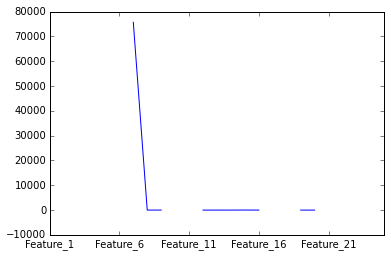

In [23]:
train_dat.ix[0, 'Feature_1':'Feature_25'].plot(kind='line')

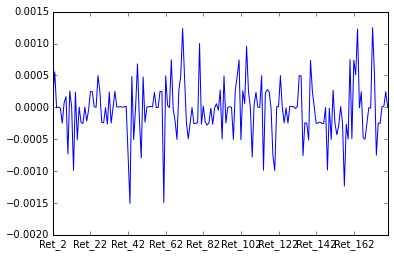

In [57]:
train_dat.ix[7, 'Ret_2':'Ret_180'].plot(kind='line')

In [56]:
train_dat.Ret_2.corr(train_dat.Ret_129)

-0.008869828325822943

In [29]:
test_dat = pd.read_csv('test.csv')

In [30]:
test_dat.shape

(60000, 147)

In [31]:
sub_dat = pd.read_csv('sample_submission.csv')

In [93]:
sub_dat.head(10)

,Id,Predicted
0,1_1,0
1,1_2,0
2,1_3,0
3,1_4,0
4,1_5,0
5,1_6,0
6,1_7,0
7,1_8,0
8,1_9,0
9,1_10,0


In [9]:
sub_dat.Id.nunique()

3720000

In [26]:
sub_dat.Predicted.nunique()

1

In [58]:
# first model linear regression
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [70]:
# fill na as 0
train_dat.loc[:, 'Feature_1':'Ret_120'] = train_dat.loc[:, 'Feature_1':'Ret_120'].fillna(0)

In [71]:
lr_res = lr.fit(train_dat.loc[:, 'Feature_1':'Ret_120'], train_dat.loc[:, 'Ret_121':'Ret_PlusTwo'])

In [72]:
lr.coef_.shape

(62, 146)

In [75]:
# fill na as 0
test_dat.loc[:, 'Feature_1':'Ret_120'] = test_dat.loc[:, 'Feature_1':'Ret_120'].fillna(0)

In [76]:
pred = lr.predict(test_dat.loc[:, 'Feature_1':'Ret_120'])

In [78]:
pred.shape

(60000, 62)

In [87]:
pred_flat = pred.flatten()

In [88]:
pred_flat.shape

(3720000,)

In [89]:
indices = []
for i in range(60000):
    for j in range(62):
        indices.append(str(i+1) + '_' + str(j+1))

In [91]:
res = pd.DataFrame({'Id': indices, 'Predicted': pred_flat})

In [92]:
res.head()

,Id,Predicted
0,1_1,-0.000121
1,1_2,0.000294
2,1_3,-0.000020
3,1_4,0.000278
4,1_5,0.000293


In [94]:
res.to_csv('sub1.csv', index=False)